In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [3]:

# Read the dataset into a DataFrame
df_snp = pd.read_csv('S&PDataset.csv')

In [4]:
df_snp.shape

(11047, 24)

In [5]:
df_snp['conm'].nunique()

495

In [6]:
df_snp.dtypes

GVKEY         int64
datadate     object
fyear         int64
indfmt       object
consol       object
popsrc       object
datafmt      object
conm         object
curcd        object
act         float64
aqc         float64
at          float64
capx        float64
ceq         float64
dt          float64
ebit        float64
icapt       float64
lct         float64
ni          float64
revt        float64
seq         float64
xrd         float64
xrdp        float64
costat       object
dtype: object

In [7]:
df_snp.drop(columns=['xrd', 'xrdp'], inplace=True) #Not considering RnD
df_snp.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
act         1975
aqc          991
at             0
capx         133
ceq            0
dt          1171
ebit           0
icapt          0
lct         1963
ni             0
revt           0
seq            0
costat         0
dtype: int64

In [8]:
df_inv = pd.read_csv('fn_inv.csv')
df_inv.dtypes

GVKEY         int64
datadate     object
fyear         int64
indfmt       object
consol       object
popsrc       object
datafmt      object
curcd        object
ivst        float64
ppegt       float64
costat       object
dtype: object

In [9]:
df_inv.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
curcd          0
ivst         305
ppegt       1119
costat         0
dtype: int64

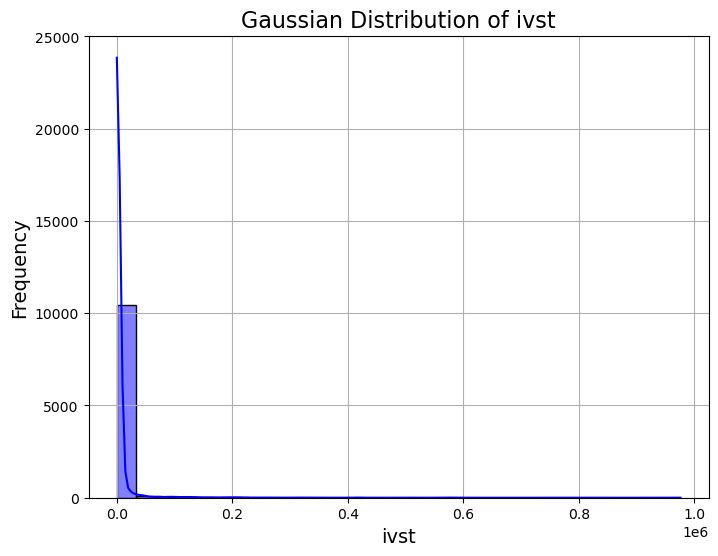

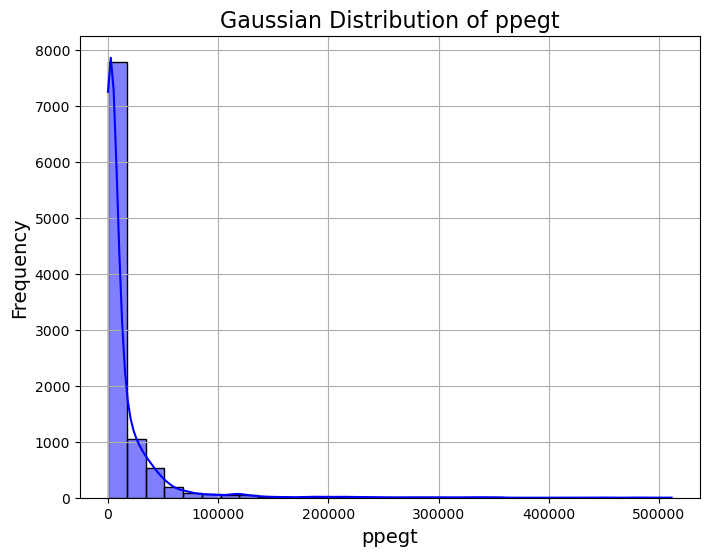

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns to plot Gaussian distribution
columns_to_plot = ['ivst', 'ppegt']

# Plot Gaussian distribution for each selected column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_inv[column], kde=True, color='blue', bins=30)
    plt.title(f'Gaussian Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()


In [11]:
from sklearn.impute import SimpleImputer

# Define SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Select columns with missing values
columns_with_missing = ['ivst', 'ppegt']

# Impute missing values in the selected columns using median
df_inv[columns_with_missing] = imputer.fit_transform(df_inv[columns_with_missing])

# Verify that there are no missing values after imputation
print(df_inv.isnull().sum())


GVKEY       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
curcd       0
ivst        0
ppegt       0
costat      0
dtype: int64


# Merge df_snp and df_inv on 'datadate' column
df_merged = pd.merge(df_snp, df_inv[['datadate','ivst', 'ppegt']], on='datadate', how='left')

# Verify that the merge was successful
print(df_merged.isnull().sum())
#No matching values for ivst and ppegt


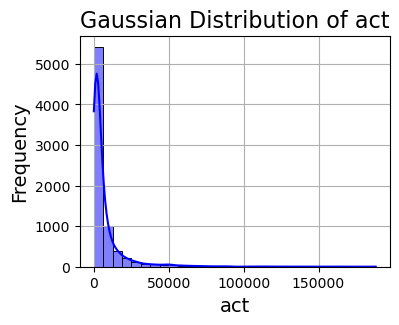

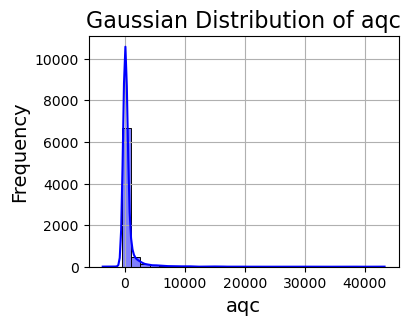

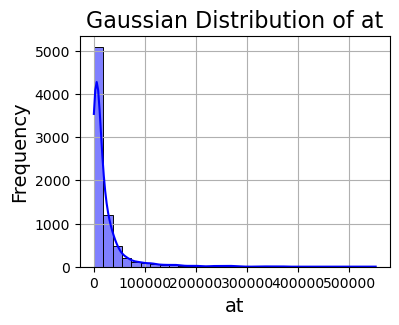

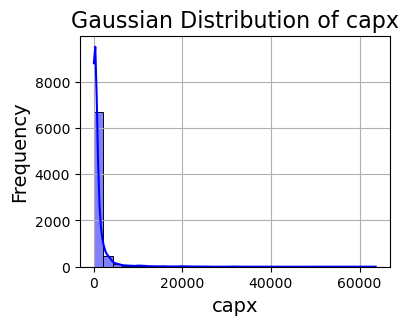

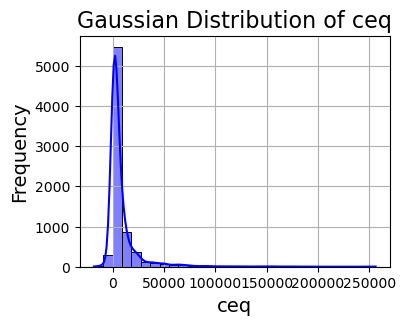

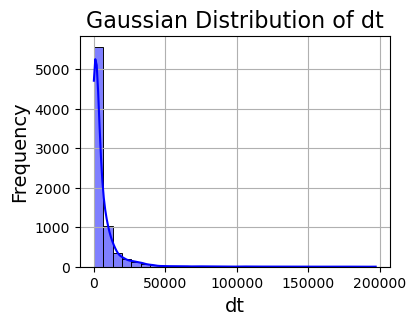

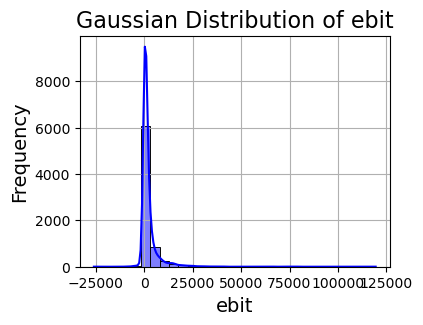

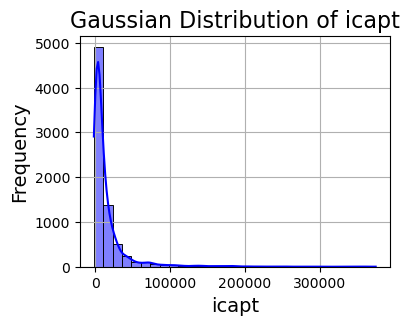

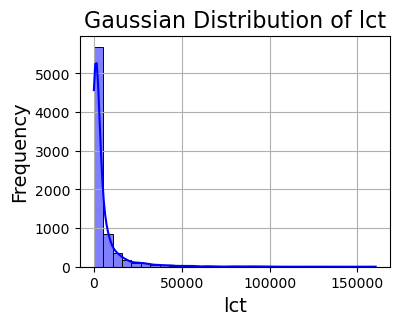

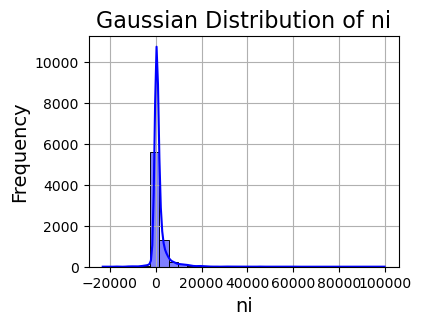

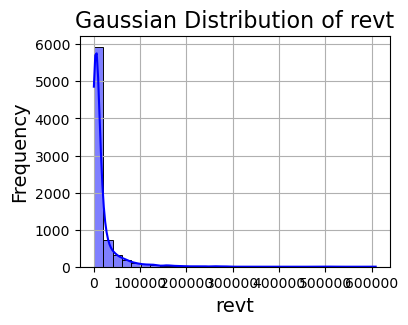

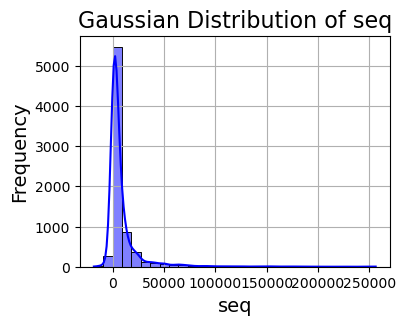

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns for which you want to plot Gaussian distribution
columns_to_plot = ['act', 'aqc', 'at', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']

# Drop rows with missing values for selected columns
df_snp_subset = df_snp.dropna(subset=columns_to_plot)
# Plot Gaussian distribution for each selected column
for column in columns_to_plot:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_snp_subset[column], kde=True, color='blue', bins=30)
    plt.title(f'Gaussian Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()


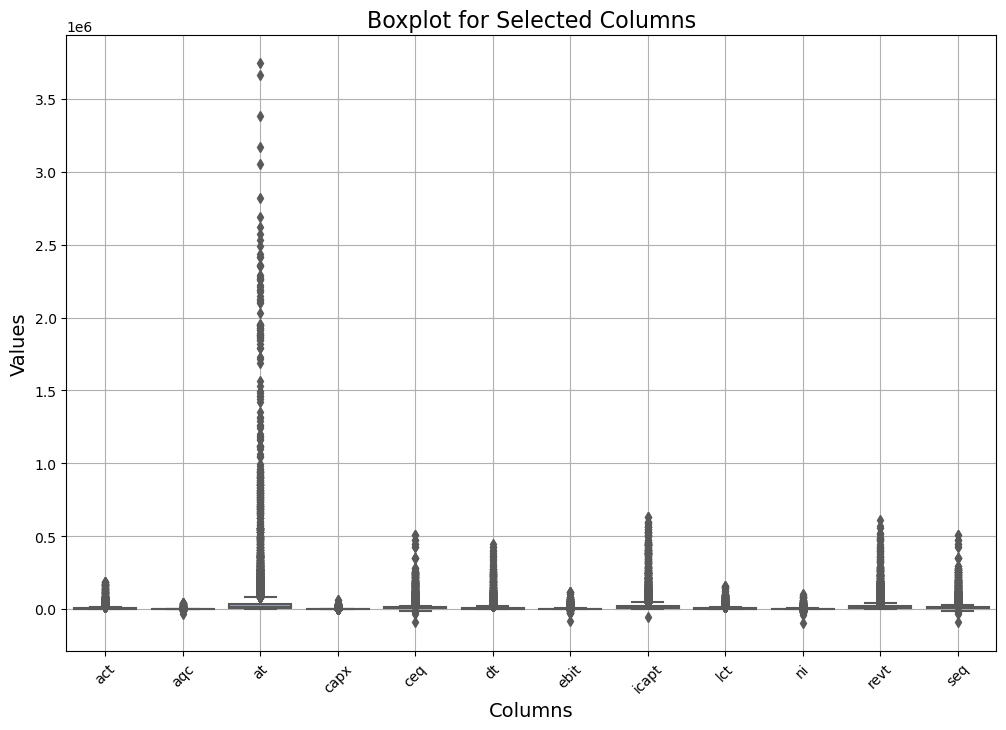

In [13]:
# Select columns for which you want to plot boxplots
columns_to_plot = ['act', 'aqc', 'at', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']

# Plot boxplots for each selected column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_snp[columns_to_plot], orient="v", palette="Set2")
plt.title('Boxplot for Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


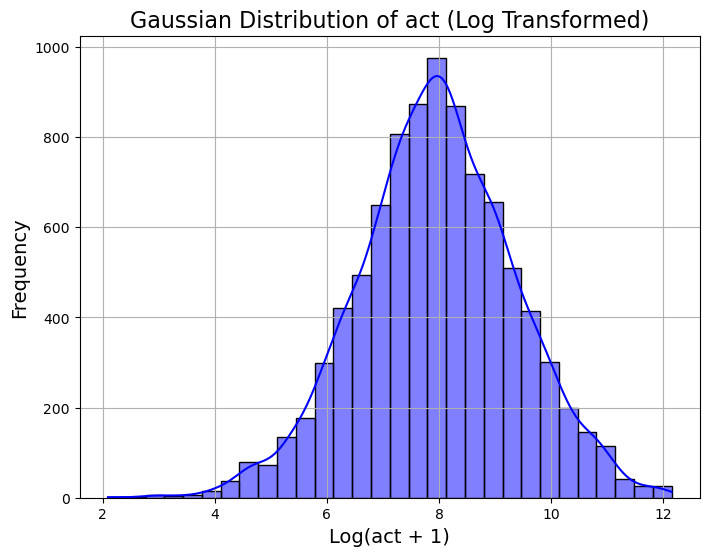

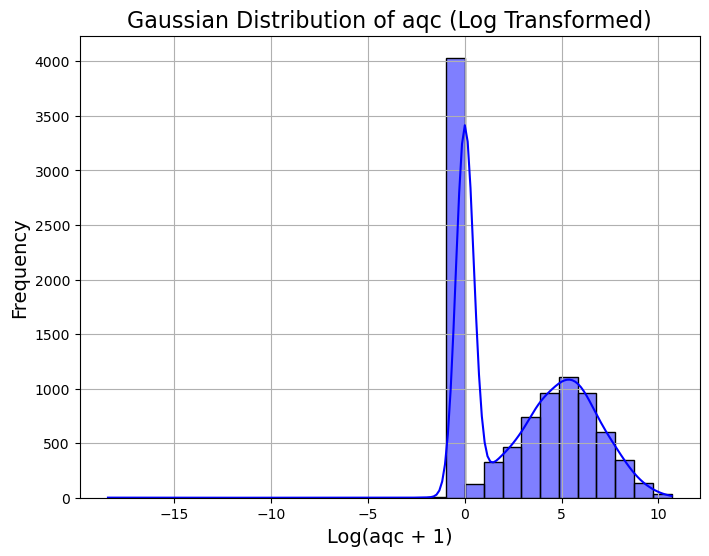

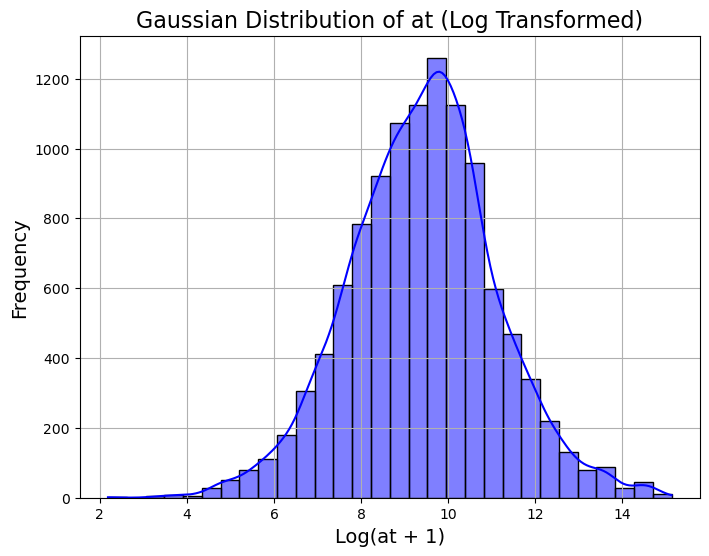

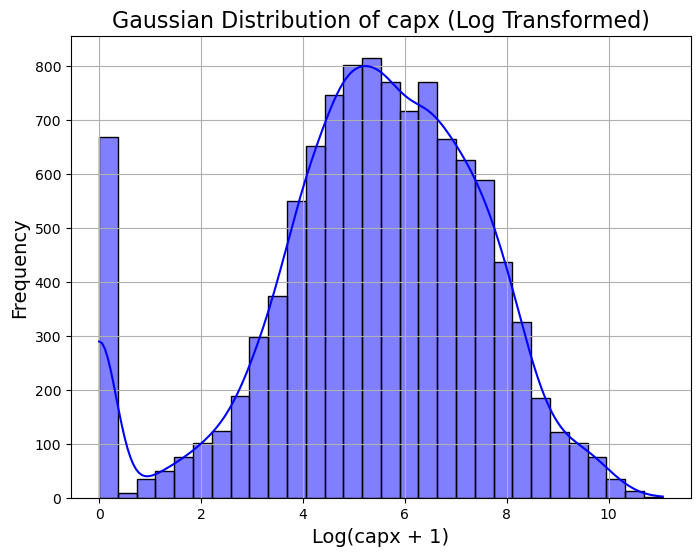

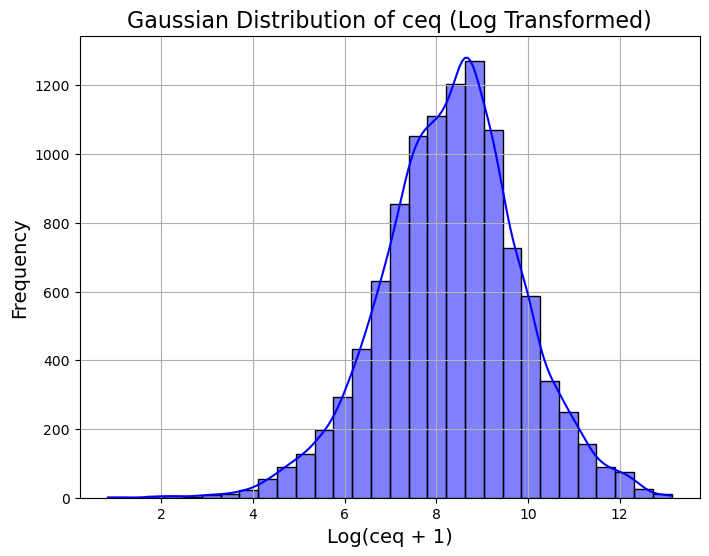

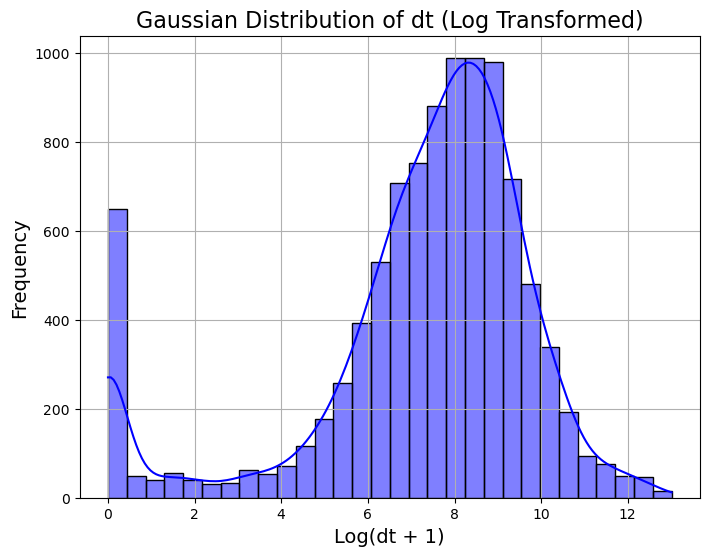

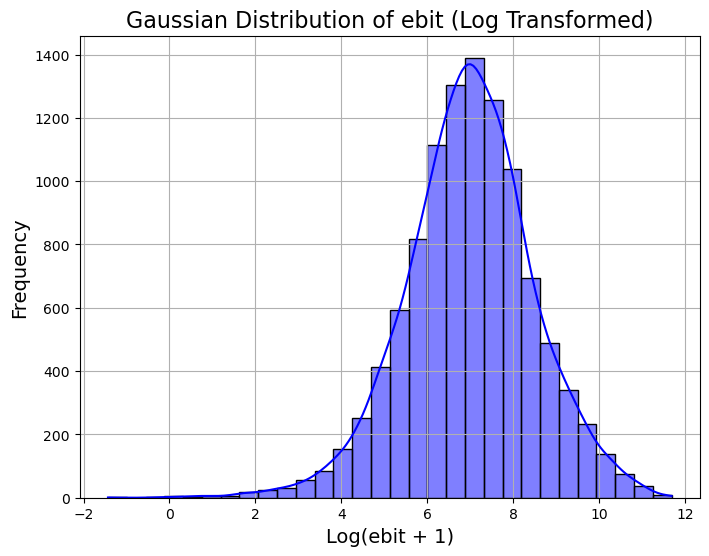

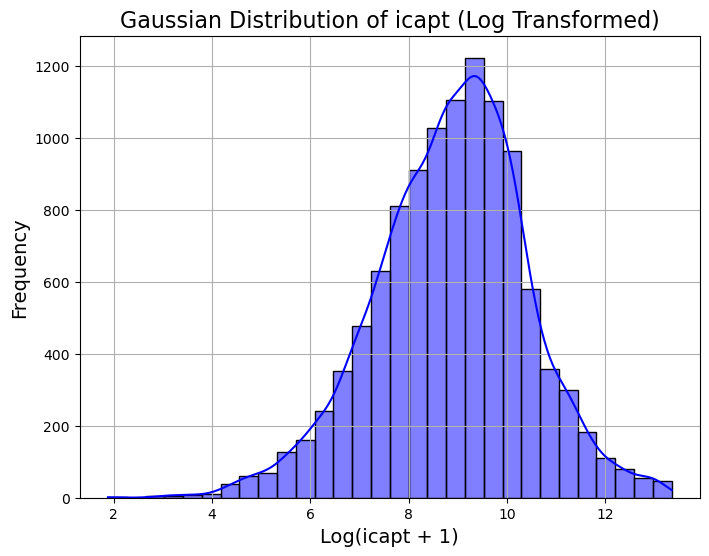

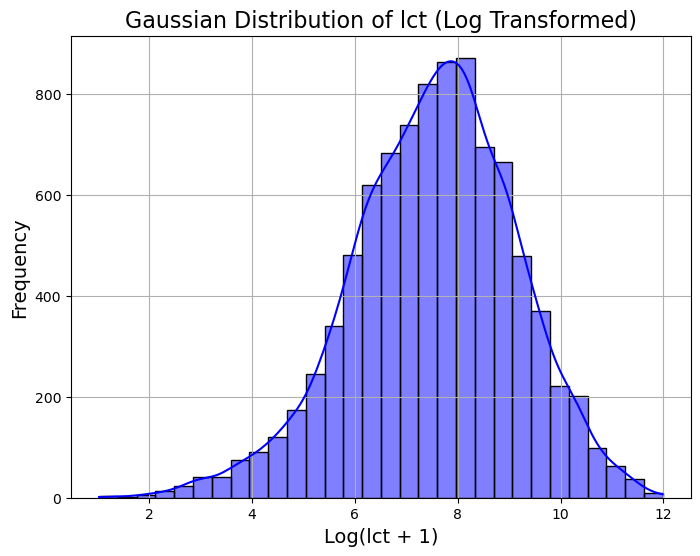

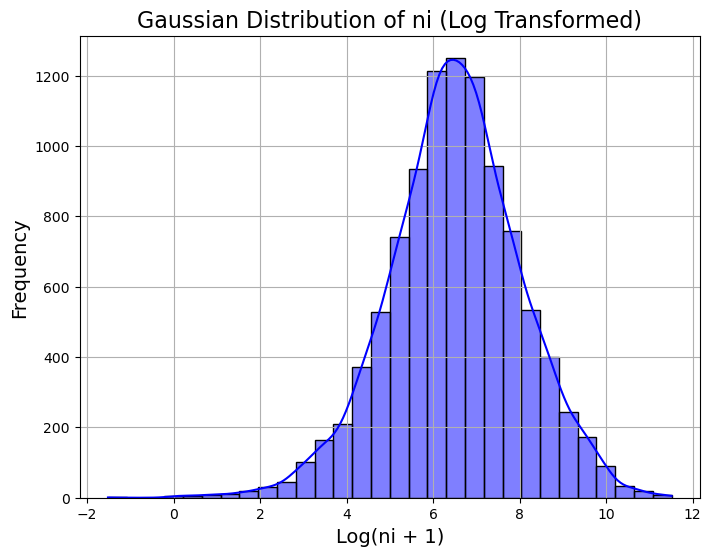

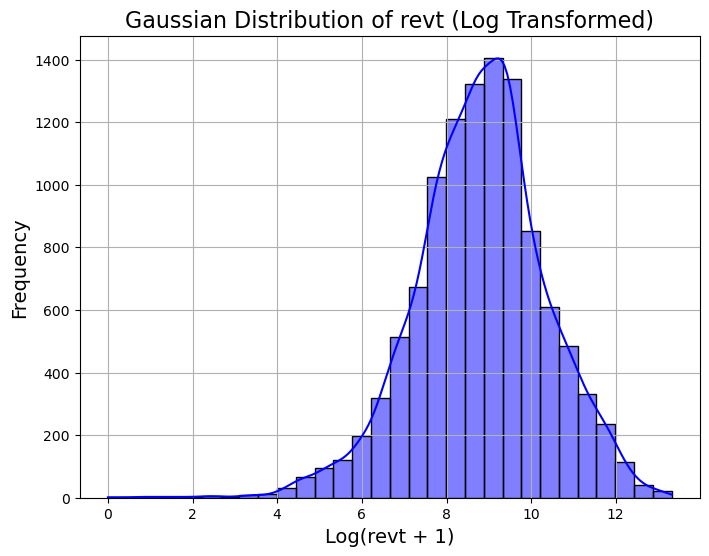

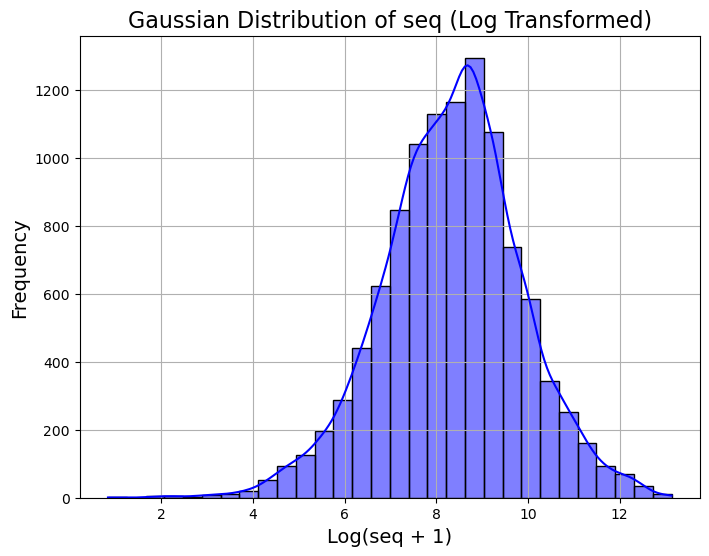

In [14]:
# Apply log transformation to selected columns, handling zero values
log_transformed_columns = ['act', 'aqc', 'at', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']
df_snp[log_transformed_columns] = np.log1p(df_snp[log_transformed_columns] + 1e-8)

# Plot Gaussian distribution for each transformed column
for column in log_transformed_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_snp[column], kde=True, color='blue', bins=30)
    plt.title(f'Gaussian Distribution of {column} (Log Transformed)', fontsize=16)
    plt.xlabel(f'Log({column} + 1)', fontsize=14)  # Adding 1 to avoid log(0)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()

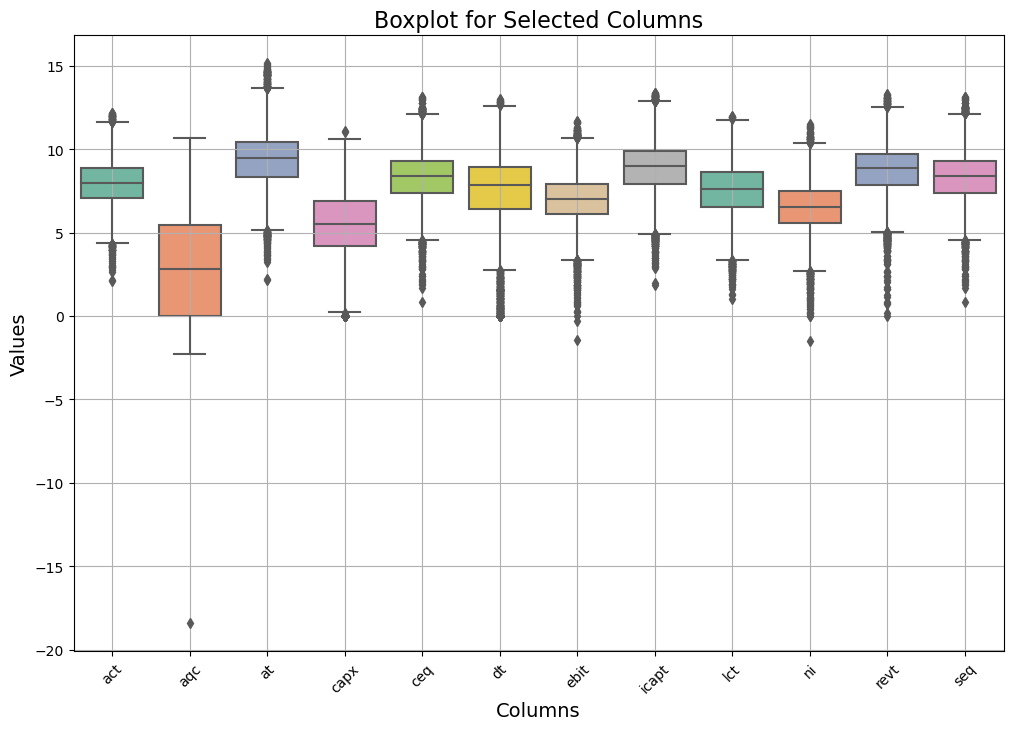

In [15]:
# Select columns for which you want to plot boxplots
columns_to_plot = ['act', 'aqc', 'at', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']

# Plot boxplots for each selected column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_snp[columns_to_plot], orient="v", palette="Set2")
plt.title('Boxplot for Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# Set a threshold around -18 to identify and remove the outlier
threshold = -10  # Define a threshold (adjust as needed)

# Filter the DataFrame to exclude rows with values close to the threshold
df_cleaned = df_snp[df_snp['aqc'] > threshold]

# Check the shape of the cleaned DataFrame to verify that the outlier row has been removed
print("Original DataFrame shape:", df_snp.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (11047, 22)
Cleaned DataFrame shape: (9827, 22)


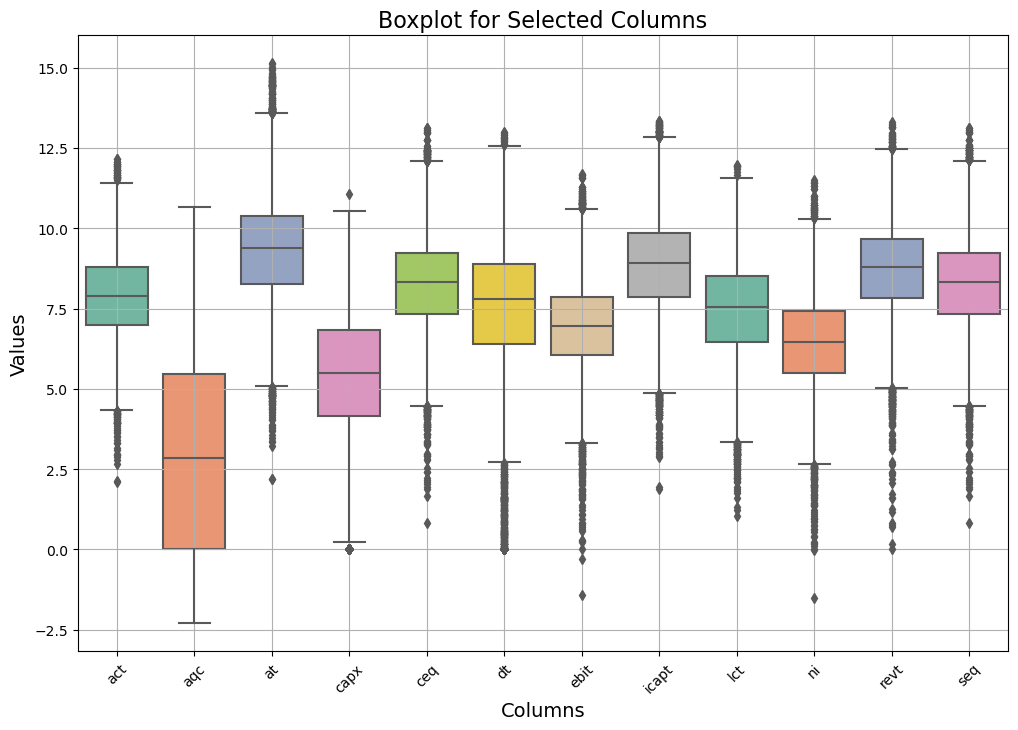

In [17]:
# Select columns for which you want to plot boxplots
columns_to_plot = ['act', 'aqc', 'at', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']

# Plot boxplots for each selected column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[columns_to_plot], orient="v", palette="Set2")
plt.title('Boxplot for Selected Columns', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
df_cleaned.isnull().sum()

GVKEY          0
datadate       0
fyear          0
indfmt         0
consol         0
popsrc         0
datafmt        0
conm           0
curcd          0
act         1709
aqc            0
at             0
capx          43
ceq          312
dt           994
ebit         423
icapt          5
lct         1697
ni           896
revt           1
seq          304
costat         0
dtype: int64

In [19]:
from sklearn.impute import KNNImputer

# Define KNNImputer with k=5 (you can adjust k as needed)
imputer = KNNImputer(n_neighbors=5)

# Select columns with missing values
columns_with_missing = ['act', 'capx', 'ceq', 'dt', 'ebit', 'icapt', 'lct', 'ni', 'revt', 'seq']

# Impute missing values in the selected columns using KNN imputation
df_snp[columns_with_missing] = imputer.fit_transform(df_snp[columns_with_missing])



In [20]:
# Rename the 'at' column to 'size'
df_snp.rename(columns={'at': 'size'}, inplace=True)


In [21]:
df_snp.dtypes

GVKEY         int64
datadate     object
fyear         int64
indfmt       object
consol       object
popsrc       object
datafmt      object
conm         object
curcd        object
act         float64
aqc         float64
size        float64
capx        float64
ceq         float64
dt          float64
ebit        float64
icapt       float64
lct         float64
ni          float64
revt        float64
seq         float64
costat       object
dtype: object

In [22]:
df_snp["liquidity"] = df_snp["size"]/df_snp["lct"]
df_snp["leverage"] = df_snp["lct"]/df_snp["ceq"]
df_snp["ROA"] = df_snp["ni"]/df_snp["size"]

df_sorted = df_snp.sort_values(by=['conm', 'fyear'])

# Calculate the change in assets for each year
df_sorted['Asset Change'] = df_sorted.groupby('conm')['size'].diff()

# Calculate the growth rate
df_sorted['Growth'] = df_sorted['Asset Change'] / df_sorted.groupby('conm')['size'].shift()

In [23]:
# Extracting the desired columns
df_model = df_sorted[['fyear', 'liquidity', 'leverage', 'ROA', 'Asset Change', 'Growth', 'icapt', 'size', 'GVKEY']]

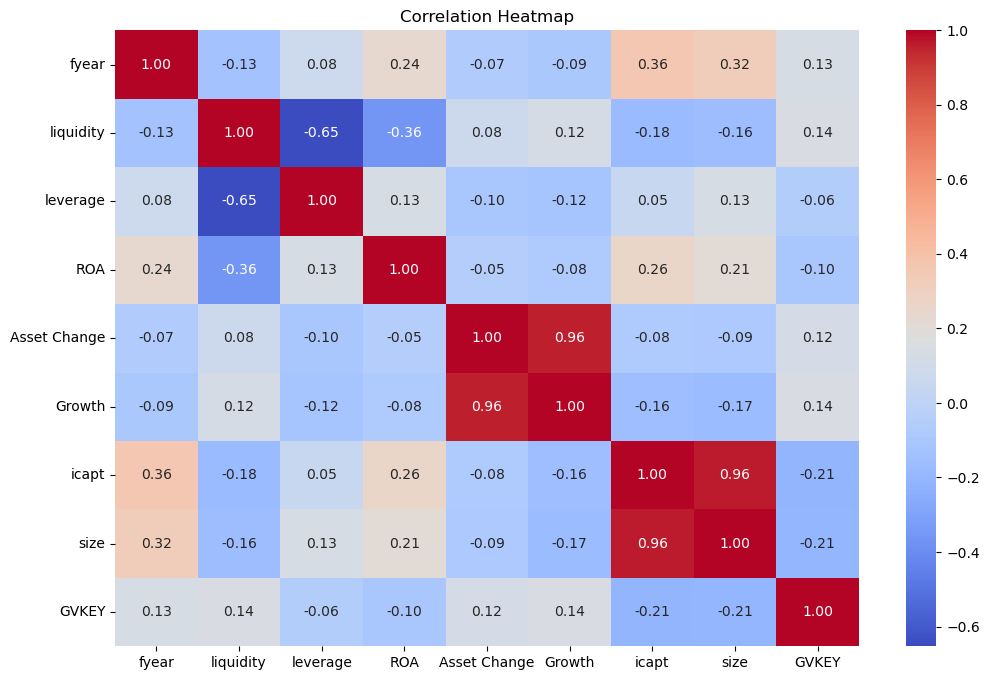

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_model.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [25]:
#Icapt and size have almost the same values and so does asset change and growth
# Drop the 'size' and 'asset change' columns
df_model.drop(columns=['size', 'Asset Change'], inplace=True)

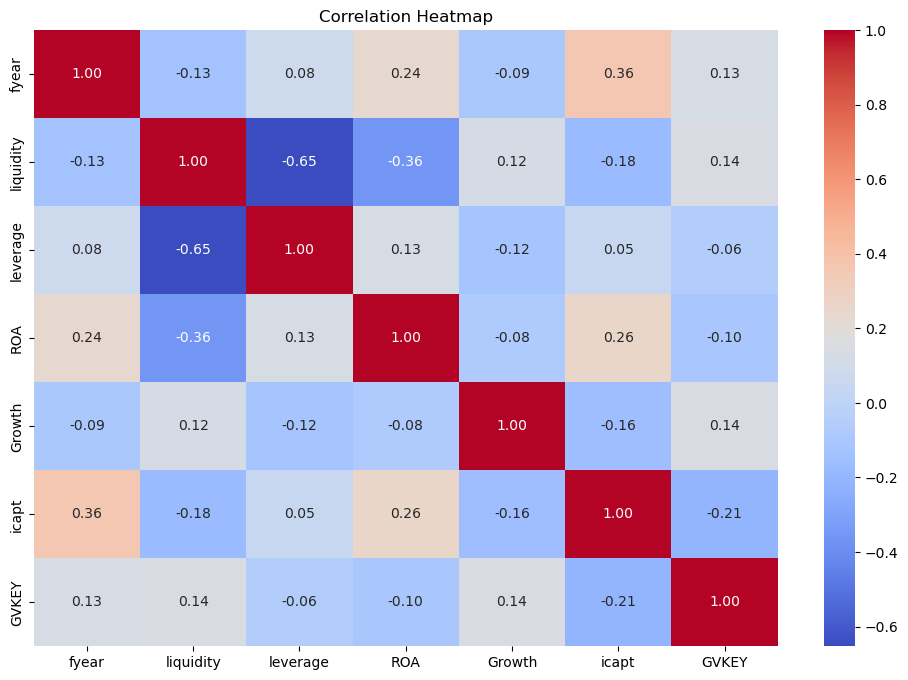

In [26]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_model.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
df_model.isnull().sum()

fyear          0
liquidity      0
leverage       0
ROA            0
Growth       495
icapt          0
GVKEY          0
dtype: int64

In [28]:
# Replacing all the Growth values by 0 for the years with no change in the assets
df_model.loc[df_model['Growth'].isnull(), 'Growth'] = 0
df_model.isnull().sum()

fyear        0
liquidity    0
leverage     0
ROA          0
Growth       0
icapt        0
GVKEY        0
dtype: int64

In [29]:
df_model.shape

(11047, 7)

# Add a new column 'total_investment' that contains the sum of 'ivst' and 'ppegt'
cleaned_df['total_investment'] = cleaned_df['ivst'] + cleaned_df['ppegt']

# Verify the DataFrame with the new column
cleaned_df.head()

In [30]:
df_cpu1 = pd.read_csv('CPU index.csv')

In [31]:
df_cpu1.head()

,date,cpu_index,old_cpu_index
0,Apr-87,43.589069,NaN
1,May-87,41.862022,NaN
2,Jun-87,71.135203,NaN
3,Jul-87,53.756704,NaN
4,Aug-87,60.615545,NaN


In [32]:
import pandas as pd

# Assuming df_cpu1 is your DataFrame containing the dataset
# Convert 'date' column to datetime format with custom date parser
df_cpu1['date'] = pd.to_datetime(df_cpu1['date'], format='%b-%y')

# Extract year from 'date' column
df_cpu1['year'] = df_cpu1['date'].dt.year

# Drop the 'old_cpu_index' column
df_cpu1.drop(columns='old_cpu_index', inplace=True)

# Group by year and compute average cpu_index
average_cpu_index = df_cpu1.groupby('year')['cpu_index'].mean().reset_index()

# Verify the result
print(average_cpu_index)


    year   cpu_index
0   1987   59.666897
1   1988   65.722413
2   1989   76.697151
3   1990   94.779705
4   1991   80.746618
5   1992   88.297105
6   1993   78.883753
7   1994   70.176454
8   1995   83.972636
9   1996   66.936481
10  1997   60.388895
11  1998   57.564906
12  1999   58.748100
13  2000   62.448747
14  2001   93.647460
15  2002   88.280674
16  2003   67.846581
17  2004   65.208485
18  2005   66.038375
19  2006   67.521463
20  2007  107.765643
21  2008   97.135520
22  2009   99.128977
23  2010  112.572259
24  2011  114.578606
25  2012  100.094996
26  2013   77.565805
27  2014   83.167437
28  2015   92.614515
29  2016  120.715749
30  2017  169.765549
31  2018  143.290591
32  2019  192.001778
33  2020  218.634176
34  2021  215.384017
35  2022  225.413245
36  2023  221.172666


In [33]:
filtered_data = average_cpu_index[(average_cpu_index['year'] >= 1999) & (average_cpu_index['year'] <= 2022)]

# Reset the index if needed
filtered_data.reset_index(drop=True, inplace=True)

# Verify the filtered data
filtered_data

,year,cpu_index
0,1999,58.748100
1,2000,62.448747
2,2001,93.647460
3,2002,88.280674
4,2003,67.846581
5,2004,65.208485
6,2005,66.038375
7,2006,67.521463
8,2007,107.765643
9,2008,97.135520


In [34]:
# Merge filtered_data with dfmodel1 on the 'fyear' column
combined_data = pd.merge(df_model, filtered_data, left_on='fyear', right_on='year', how='inner')

# Drop the redundant 'year' column
combined_data.drop(columns='year', inplace=True)

# Verify the combined data
print(combined_data)

       fyear  liquidity  leverage       ROA    Growth     icapt   GVKEY  \
0       1999   1.156574  0.942983  0.783625  0.000000  9.004668    7435   
1       1999   1.138337  0.944202  0.814461  0.000000  9.078566    1078   
2       1999   1.196186  0.896269  0.818367  0.000000  6.240683   12540   
3       1999   1.230255  0.897809  0.684373  0.000000  8.133750    1161   
4       1999   1.266751  0.996734  0.546290  0.000000  9.675457   24216   
...      ...        ...       ...       ...       ...       ...     ...   
11042   2022   1.169247  0.923480  0.828935 -0.002337  8.104401   65417   
11043   2022   1.151097  0.979957  0.687815  0.021954  8.451481   24405   
11044   2022   1.281916  0.826668  0.547283 -0.010681  9.761204  144559   
11045   2022   1.702863  0.797004  0.597346 -0.003496  8.633197   11687   
11046   2022   1.192288  0.960687  0.796683  0.007458  9.318477   13721   

        cpu_index  
0       58.748100  
1       58.748100  
2       58.748100  
3       58.748100  

In [35]:
combined_data.isnull().sum()

fyear        0
liquidity    0
leverage     0
ROA          0
Growth       0
icapt        0
GVKEY        0
cpu_index    0
dtype: int64

In [36]:
# Assuming combined_data is your DataFrame containing the combined data
combined_data.to_csv('combined_data1.csv', index=False)
